<h2 style="color:Green;">Setup and Loading Packages</h2> Setup and Loading Packages

In [10]:
%matplotlib inline

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
import pandas_datareader as pdr

from sklearn.ensemble import RandomForestRegressor
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import SGDRegressor

In [11]:
! pip install pandas_datareader

<h2 style="color:Green;">Real GDP Growth Rate Predictions by Country</h2><br/>

Gross Domestic Products (GDP) growth has been a hot topic in macroeconomics and an economist on your team needs your help to uncover its implications from a statistical learning perspective. The economist gathered some data from the U.S. Bureau of Economic Analysis (BEA) and OECD’s Composite Leading Indicators (CLIs) repositories. The U.S. BEA stores macro and micro-economic measures on a multinational level as the OECD CLIs screens the conditions that dictates the economic booms and busts of OECD countries. <br><br>

4 indictors are gathered from each of the 10 selected OECD countries: monthly real income, employment, industrial production, and wholesale-retail sales. The countries include the United States, United Kingdom, Netherlands, Luxembourg, Japan, Korea, Germany, France, Denmark, and Canada. The indicators are collected over the past 240 months (20 years), from October 1999 to September 2019, so there is a total of 2400 observations. <br><br>

We want to examine the predictive power of these features in a linear model that forecasts the real Gross Domestic Products (GDP) growth rate for each country. 

In [12]:
# loading the csv data set from local directory
OECD = pd.read_csv("C:/Users/Alan Wei/Downloads/OECD_DATA.csv"); OECD = OECD.set_index('Date')
# converting real GDP index to growth rate (we do not take the log this time)
OECD['realGDP'] = OECD['realGDP'].pct_change()
# drop NaN values
OECD = OECD.dropna()
OECD.info

<bound method DataFrame.info of           Country   realGDP  realPersInc  unempRate  indProd  retailSales
Date                                                                     
11/1/1999     USA  0.000988   120.886465      0.041    89.75      85.8164
12/1/1999     USA  0.000691   120.702974      0.040    90.44      87.4060
1/1/2000      USA  0.000592   120.649898      0.040    90.46      86.4326
2/1/2000      USA  0.000591   120.657155      0.041    90.73      87.3692
3/1/2000      USA  0.000690   120.614413      0.040    91.05      87.8100
...           ...       ...          ...        ...      ...          ...
5/1/2019   Canada  0.000300    91.431046      0.054   110.67     111.0259
6/1/2019   Canada  0.000100    91.094052      0.056   110.22     111.3524
7/1/2019   Canada -0.000100    90.793031      0.057   108.37     111.4433
8/1/2019   Canada -0.000200    90.556263      0.057   108.50     111.7465
9/1/2019   Canada -0.000200    90.410000      0.055   107.97     111.7418

[2399

Explanatory Variable: Country, and other indicators
Response Variable: GDP growth rate (linear model) in the future

Here we are standardizing the features that we can

In [13]:
VAR_NAMES = ['Country','realGDP',  'realPersInc', 'unempRate', 'indProd', 'retailSales']
FEATURES = VAR_NAMES[2:]
OECD.loc[:, FEATURES] = scale(OECD.loc[:, FEATURES]) # standardizing indicators

In order to include country as a variable, created columns for dummy variables where only the value for USA which we are trying to predict has a 1.

I added 9 columns when there are 10 countries in our original data set because when all 9 dummy variables are set to 0, the regression output will represent the result for the country that doesn't have its own added column. <br><br>

In [14]:

OECD = pd.get_dummies(data=OECD, drop_first=True)
FEATURES = OECD.columns[1:]
OECD.head()

,realGDP,realPersInc,unempRate,indProd,retailSales,Country_Denmark,Country_France,Country_Germany,Country_Japan,Country_Korea,Country_Luxembourg,Country_Netherlands,Country_UK,Country_USA
Date,,,,,,,,,,,,,,
11/1/1999,0.000988,1.796302,-0.821803,-0.808932,-0.384360,0,0,0,0,0,0,0,0,1
12/1/1999,0.000691,1.775151,-0.871149,-0.748722,-0.286125,0,0,0,0,0,0,0,0,1
1/1/2000,0.000592,1.769032,-0.871149,-0.746977,-0.346280,0,0,0,0,0,0,0,0,1
2/1/2000,0.000591,1.769869,-0.821803,-0.723416,-0.288399,0,0,0,0,0,0,0,0,1
3/1/2000,0.000690,1.764942,-0.871149,-0.695493,-0.261159,0,0,0,0,0,0,0,0,1


Now I can split the training data into 75% training and 25% testing sets.

In [15]:

LABEL = 'realGDP'
X_train, X_test, y_train, y_test = train_test_split(OECD.loc[:, FEATURES], OECD.loc[:, LABEL], test_size=0.25, random_state=0)


Here we want to see that all the features are important, so we will run a feature importance test from the random forest model.

Testing feature importance here:

Text(0.5, 0, 'Relative Importance')

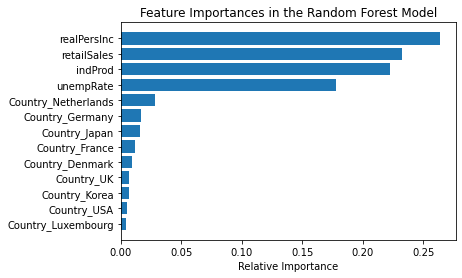

In [16]:
from sklearn.ensemble import RandomForestRegressor # importing the random forest module

rf_model = RandomForestRegressor(random_state=0) # define the random forest model

rf_model.fit(X_train, y_train) # fit the random forest model

importances = rf_model.feature_importances_ # get importance

indices = np.argsort(importances) # sort the features' index by their importance scores

plt.title('Feature Importances in the Random Forest Model')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [FEATURES[i] for i in indices])
plt.xlabel('Relative Importance')

Multicolineararity Test:

In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
VIF = [variance_inflation_factor(OECD.loc[:, FEATURES].values, i) for i in range(len(FEATURES))]
VIF_table = pd.DataFrame({'Features': FEATURES, 'VIF': VIF})
VIF_table

,Features,VIF
0,realPersInc,1.723912
1,unempRate,2.435666
2,indProd,2.242862
3,retailSales,2.094585
4,Country_Denmark,1.166142
5,Country_France,1.891253
6,Country_Germany,1.134902
7,Country_Japan,1.186148
8,Country_Korea,1.977866
9,Country_Luxembourg,1.411761


Here I fit a multiple linear regression to the data, then print the resulting Adjusted R-squared, MAE, and RMSE metrics. 

In [18]:
linear_model = LinearRegression()


linear_model = linear_model.fit(X_train, y_train)
print('intercept: ', linear_model.intercept_)
print('coefficients: ', linear_model.coef_)
X_ols = sm.add_constant(X_train)
statsmodel = sm.OLS(y_train, X_ols).fit()
print(statsmodel.summary())
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_test_pred = linear_model.predict(X_test)
r2 = r2_score(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)
rmse = mean_squared_error(y_test, y_test_pred, squared=False)

print('The Adjusted R-squared is: ', 1-(1-r2)*(OECD.shape[0]-1)/(OECD.shape[0]-len(FEATURES)-1))
print('The MAE is: ', mae)
print('The RMSE is: ', rmse)

intercept:  -0.0002038638395117503
coefficients:  [ 1.05993564e-04  3.74296397e-04  2.19173918e-04  1.88501122e-05
  8.18097003e-05 -4.74259565e-04 -5.29082145e-05  3.77789866e-04
  9.39144404e-04  3.24067560e-04  2.02917379e-04  9.73525532e-05
  2.50596174e-04]
                            OLS Regression Results                            
Dep. Variable:                realGDP   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     2.661
Date:                Sat, 23 Jul 2022   Prob (F-statistic):            0.00106
Time:                        18:35:02   Log-Likelihood:                 8812.3
No. Observations:                1799   AIC:                        -1.760e+04
Df Residuals:                    1785   BIC:                        -1.752e+04
Df Model:                          13                                         
Covariance Type:          

Here I fit a ridge regression to the data, then print the resulting Adjusted R-squared, MAE, and RMSE metrics.

In [19]:
from sklearn.linear_model import RidgeCV
ridge_model = RidgeCV(cv=5, scoring='r2')
ridge_model = ridge_model.fit(X_train, y_train)
print('The lambda is:', ridge_model.alpha_)
y_test_pred_ridge = ridge_model.predict(X_test)
r2_ridge = r2_score(y_test, y_test_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_test_pred_ridge)
rmse_ridge = mean_squared_error(y_test, y_test_pred_ridge, squared=False)
print('The Adjusted R-squared is: ', 1-(1-r2_ridge)*(OECD.shape[0]-1)/(OECD.shape[0]-len(FEATURES)-1))
print('The MAE is: ', mae_ridge)
print('The RMSE is: ', rmse_ridge)

The lambda is: 10.0
The Adjusted R-squared is:  -0.0011210804926695683
The MAE is:  0.0011116109555797651
The RMSE is:  0.0016002424624718438


Here I fit a lasso regression to the data, then print the resulting Adjusted R-squared, MAE, and RMSE metrics.

In [20]:
from sklearn.linear_model import LassoCV 
lasso_model = LassoCV(cv=5)
lasso_model = lasso_model.fit(X_train, y_train)
print('The lambda is:', lasso_model.alpha_)
y_test_pred_lasso = lasso_model.predict(X_test)
r2_lasso = r2_score(y_test, y_test_pred_lasso)
mae_lasso = mean_absolute_error(y_test, y_test_pred_lasso)
rmse_lasso = mean_squared_error(y_test, y_test_pred_lasso, squared=False)
print('The Adjusted R-squared is: ', 1-(1-r2_lasso)*(OECD.shape[0]-1)/(OECD.shape[0]-len(FEATURES)-1))
print('The MAE is: ', mae_lasso)
print('The RMSE is: ', rmse_lasso)

The lambda is: 2.408945910452003e-06
The Adjusted R-squared is:  -0.0016100473091211764
The MAE is:  0.0011125699424768827
The RMSE is:  0.0016006332093845773


It is difficult to tell since the MAE and RMSE values are so close for all three of the models, but the ridge regression seems to fit the best, having the lower MAE and RMSE values by the ever so slight amount.

intercept:  -0.0002038638395117503
coefficients:  [ 1.05993564e-04  3.74296397e-04  2.19173918e-04  1.88501122e-05
  8.18097003e-05 -4.74259565e-04 -5.29082145e-05  3.77789866e-04
  9.39144404e-04  3.24067560e-04  2.02917379e-04  9.73525532e-05
  2.50596174e-04]

In [21]:
print('intercept: ', linear_model.intercept_)
print('coefficients: ', linear_model.coef_)

intercept:  -0.0002038638395117503
coefficients:  [ 1.05993564e-04  3.74296397e-04  2.19173918e-04  1.88501122e-05
  8.18097003e-05 -4.74259565e-04 -5.29082145e-05  3.77789866e-04
  9.39144404e-04  3.24067560e-04  2.02917379e-04  9.73525532e-05
  2.50596174e-04]


We can adjust R^2 by adding additional variables to the problem.